In [37]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy
from scipy.optimize import curve_fit
import glob
import os
%matplotlib inline

In [2]:
#pip install tabulate

1932.1415445525677
-39.1055536685285
(array([ -39.10555367, 1932.14154455]), array([[inf, inf],
       [inf, inf]]))


ValueError: could not broadcast input array from shape (2,2) into shape (2)

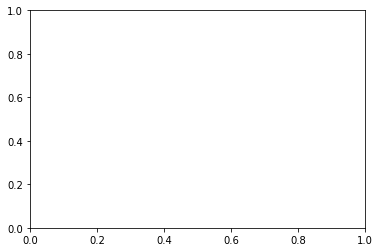

In [40]:
#use of glob to get all .txt files in the folder
path = os.getcwd()
txt_files = glob.glob(os.path.join(path, "*.txt"))
argon_data_frames = {}
helium_data_frames = {}

for file in txt_files: 
    df = pd.read_csv(file)
    df = df.drop(columns='Unnamed: 5')
    df = df.dropna(axis =0)
    df_columns = df.keys()

    df = df.astype('float64')

    #df.plot(df_columns[0], df_columns[1], title = file)
#     print(df[df_columns[1]], df[df_columns[0]])
    if "Helium" in file: 
       
        helium_data_frames[file] =  df
    else: 

        argon_data_frames[file]= df
        

#/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt
#There are only two files with good data. This file is the best one.  


m_e = 9.10938356 * 10**(-31)
m_i = (6.6335209 * 10**(-26)) - (9.10938356 * 10**(-31)) #neutral minus electron
k = 8.617333262145 * 10**(-5) #electronvolts The k constant actually doesn't matter that much because it gets cancelled out in line 66
e = 1.60217662 * 10**(-19) #charge of electron in coloumbs

def exponential(V_bias, V_plasma, T_e):
    """ function we are trying to fit to
    """
    I_electron = np.exp(-e*(V_plasma - V_bias)/(k*T_e))
    return I_electron                                                                                                                          
                                                                                                                                     

IV_array = helium_data_frames["/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt"][df_columns[0:2]].to_numpy()
#current in first column. voltage in second column

shape = int(np.shape(IV_array)[0])

current_min = shape - shape%6 # the positive current starts in the last sixth of the array. we can only use positive current because the logarithm input in line 68 cannot be negative
current_max = shape 




linear_current_array = np.log(derivative_array[current_min: current_max,1])#according to Wissel paper 
linear_ansatz_T_e = np.gradient(linear_current_array, 1) * 1/k #according to Wissel paper 
linear_ansatz_T_e = np.average(linear_ansatz_T_e) #guess of the electron temperature. just approximating to first order with an average 



V_float_ansatz = -40 #the voltage where the current turns positive. found it by eye
V_plasma_ansatz = V_float_ansatz + (k*linear_ansatz_T_e/2)*np.log(2*m_i/(np.pi*m_e)) #from Wissel paper 
#fit = scipy.optimize.curve_fit(exponential, helium_data_frames["/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt"][df_columns[0]], helium_data_frames["/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt"][df_columns[1]] , [V_plasma_ansatz, linear_ansatz_T_e ])
print(fit)

#plt.plot(fit, IV_array[:, 1])

#### 

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(data_frames)):
#     print(type(i))
#     print(i.keys())
    probe_voltage = data_frames[i]['probe voltage (V)']
    probe_current = data_frames[i][' probe current (A)']
    plt.plot(probe_voltage, probe_current)
    

In [ ]:
len(data_frames[0])

In [ ]:
data_frames[0][' probe current (A)']